In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Q1

In [2]:
df={(180,7):'Apple',(200,6):'Apple',(150,4):'Orange',(170,5):'Orange',(160,6):'Apple',(140,3):'Orange'}

In [37]:
def knn(t1,k=3):
    l1=[]
    for key,val in df.items():
        l1.append((np.sqrt((key[0]-t1[0])**2+(key[1]-t1[1])**2),val))
    l1=sorted(l1,key=lambda x:x[0])
    label=[]
    x=0
    while x<k:
        label.append(l1[x][1])
        x+=1
    label_d={}
    for ele in label:
        if ele not in label_d:
            label_d[ele]=1
        else:
            label_d[ele]+=1
    label_d=dict(sorted(label_d.items(),key=lambda item:item[1],reverse=True))
    return list(label_d.keys())[0]

In [38]:
t1=(165,5.5)
label=knn(t1,k=3)
print(label)

Apple


In [39]:
def euclidean(t1):
    l1=[]
    for key,val in df.items():
        l1.append((np.sqrt((key[0]-t1[0])**2+(key[1]-t1[1])**2),val))
    l1=sorted(l1,key=lambda x:x[0])
    print(l1)
def manhattan(t1):
    l1=[]
    for key,val in df.items():
        l1.append((abs(key[0]-t1[0])+abs(key[1]-t1[1]),val))
    l1=sorted(l1,key=lambda x:x[0])
    print(l1)
def minkowski(t1,p=4):
    l1=[]
    for key,val in df.items():
        l1.append((((key[0]-t1[0])**p+(key[1]-t1[1])**4)**(1/p),val))
    l1=sorted(l1,key=lambda x:x[0])
    print(l1)
    

In [40]:
euclidean(t1)
manhattan(t1)
minkowski(t1,p=4)

[(0.0, 'Apple'), (5.024937810560445, 'Orange'), (5.024937810560445, 'Apple'), (15.074813431681335, 'Apple'), (15.074813431681335, 'Orange'), (25.124689052802225, 'Orange'), (35.00357124637428, 'Apple')]
[(0.0, 'Apple'), (5.5, 'Orange'), (5.5, 'Apple'), (16.5, 'Apple'), (16.5, 'Orange'), (27.5, 'Orange'), (35.5, 'Apple')]
[(0.0, 'Apple'), (5.000124995312773, 'Orange'), (5.000124995312773, 'Apple'), (15.00037498593832, 'Apple'), (15.00037498593832, 'Orange'), (25.000624976563866, 'Orange'), (35.00000036443148, 'Apple')]


In [41]:
label1=knn(t1,k=1)
label2=knn(t1,k=5)
print(f"k=1:{label1}")
print(f"k=5:{label2}")

k=1:Apple
k=5:Apple


In [42]:
df[t1]=label
df

{(180, 7): 'Apple',
 (200, 6): 'Apple',
 (150, 4): 'Orange',
 (170, 5): 'Orange',
 (160, 6): 'Apple',
 (140, 3): 'Orange',
 (165, 5.5): 'Apple'}

In [73]:

point = (162.5, 5.25)
x2, y2 = 200, 5.75
slope = (y2 - point[1]) / (x2 - point[0])  

line_x = np.linspace(100, 210, 100) 

line_y = slope * (line_x - point[0]) + point[1]

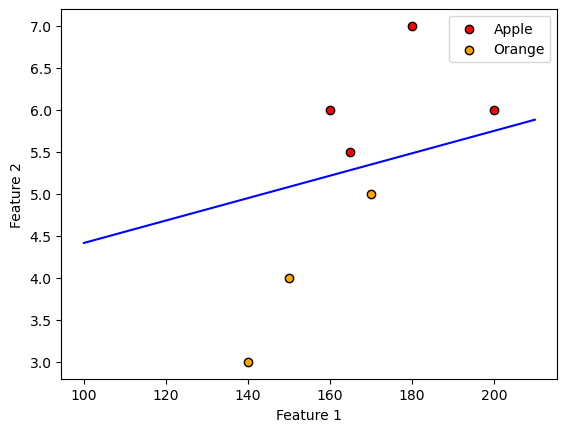

In [74]:
X = np.array(list(df.keys()))
y = np.array(list(df.values()))

label_mapping = {'Apple': 0, 'Orange': 1}
y_numeric = np.array([label_mapping[label] for label in y])
colors = {0: 'red', 1: 'orange'}  

for class_label, color in colors.items():
    plt.scatter(X[y_numeric == class_label, 0], X[y_numeric == class_label, 1], 
                color=color, edgecolors='k', label='Apple' if class_label == 0 else 'Orange')


plt.plot(line_x, line_y, color='blue')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances


data = {
    (180, 7): 'Apple',
    (200, 6): 'Apple',
    (150, 4): 'Orange',
    (170, 5): 'Orange',
    (160, 6): 'Apple',
    (140, 3): 'Orange'
}


X = np.array(list(data.keys()))
y = np.array(list(data.values()))


y = np.where(y == 'Apple', 1, 0)  


k = 3 
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)


t1 = np.array([[165, 5.5]])


prediction = knn.predict(t1)
predicted_class = 'Apple' if prediction[0] == 1 else 'Orange'
print(f"The predicted class for point {t1[0]} is: {predicted_class}")



euclidean_distance = np.linalg.norm(t1 - X, axis=1)
manhattan_distance = np.sum(np.abs(t1 - X), axis=1)
minkowski_distance = pairwise_distances(t1, X, metric='minkowski', p=3).flatten()


print("Distances to neighbors:")
for i, (euclidean, manhattan, minkowski) in enumerate(zip(euclidean_distance, manhattan_distance, minkowski_distance)):
    print(f"Point {i + 1}: Euclidean = {euclidean:.2f}, Manhattan = {manhattan:.2f}, Minkowski (p=3) = {minkowski:.2f}")


The predicted class for point [165.    5.5] is: Orange
Distances to neighbors:
Point 1: Euclidean = 15.07, Manhattan = 16.50, Minkowski (p=3) = 15.00
Point 2: Euclidean = 35.00, Manhattan = 35.50, Minkowski (p=3) = 35.00
Point 3: Euclidean = 15.07, Manhattan = 16.50, Minkowski (p=3) = 15.00
Point 4: Euclidean = 5.02, Manhattan = 5.50, Minkowski (p=3) = 5.00
Point 5: Euclidean = 5.02, Manhattan = 5.50, Minkowski (p=3) = 5.00
Point 6: Euclidean = 25.12, Manhattan = 27.50, Minkowski (p=3) = 25.01


### Q2

In [80]:
data={
    'Age':[30,45,50,35,60,55,40,25,65,45],
    'Blood Pressure':['High','Low','High','Low','High','Low','High','Low','High','Low'],
    'Cholesterol':['High','Normal','High','Normal','High','Normal','High','Normal','High','Normal'],
    'Diagnosis':['Sick','Healthy','Sick','Healthy','Sick','Healthy','Sick','Healthy','Sick','Healthy']
}
data_df = pd.DataFrame(data)
target_variable = 'Diagnosis'
features = ['Age', 'Blood Pressure', 'Cholesterol']

In [108]:
def calculate_entropy(data, target_col):
    class_counts = data[target_col].value_counts(normalize=True)
    entropy = -sum(class_counts * np.log2(class_counts + 1e-9))
    return entropy

In [109]:
entropy = calculate_entropy(data_df, target_variable)
print(f"Entropy of target variable {target_variable}: {entropy:.4f}")

Entropy of target variable Diagnosis: 1.0000


In [110]:

def calculate_information_gain(data, feature, target_col):
    total_entropy = calculate_entropy(data, target_col)
    feature_entropy = data.groupby(feature).apply(lambda x: calculate_entropy(x, target_col)).sum()
    info_gain = total_entropy - feature_entropy
    return info_gain

In [111]:

for feature in features:
    info_gain = calculate_information_gain(data_df, feature, target_variable)
    print(f"Information Gain for feature '{feature}': {info_gain:.4f}")

Information Gain for feature 'Age': 1.0000
Information Gain for feature 'Blood Pressure': 1.0000
Information Gain for feature 'Cholesterol': 1.0000


In [117]:
def id3(data, target_col, features):
    if len(data[target_col].unique()) == 1:
        return data[target_col].iloc[0]

    if not features:
        return data[target_col].mode()[0]

    gains = {feature: calculate_information_gain(data, feature, target_col) for feature in features}
    best_feature = max(gains, key=gains.get)
    
    tree = {best_feature: {}}

    print(f"Feature: '{best_feature}'")
    
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        print(f"  Split on '{best_feature}': {value}")
        
        
        tree[best_feature][value] = id3(subset, target_col, [f for f in features if f != best_feature])
    
    return tree

In [118]:
from pprint import pprint
decision_tree=id3(data_df,target_variable,features)
print("\nDecision Tree:")
pprint(decision_tree)


Feature: 'Age'
  Split on 'Age': 30
  Split on 'Age': 45
  Split on 'Age': 50
  Split on 'Age': 35
  Split on 'Age': 60
  Split on 'Age': 55
  Split on 'Age': 40
  Split on 'Age': 25
  Split on 'Age': 65

Decision Tree:
{'Age': {25: 'Healthy',
         30: 'Sick',
         35: 'Healthy',
         40: 'Sick',
         45: 'Healthy',
         50: 'Sick',
         55: 'Healthy',
         60: 'Sick',
         65: 'Sick'}}


In [119]:
def predict(tree, patient):

    if not isinstance(tree, dict):
        return tree 
    
    feature = next(iter(tree))  
    feature_value = patient[feature]  
    

    if feature_value in tree[feature]:
        return predict(tree[feature][feature_value], patient)
    else:
        return "Unknown" 


patient = {
    'Age': 50,
    'Blood Pressure': 'Low',  
    'Cholesterol': 'Normal'       
}


prediction = predict(decision_tree, patient)

print(f"The predicted diagnosis for the patient is: {prediction}")


The predicted diagnosis for the patient is: Sick


In [124]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


data = {
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Normal'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}


df = pd.DataFrame(data)


df['Blood Pressure'] = df['Blood Pressure'].map({'High': 1, 'Low': 0, 'Normal': 2})
df['Cholesterol'] = df['Cholesterol'].map({'High': 1, 'Normal': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Sick': 1, 'Healthy': 0})


X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)




importances = clf.feature_importances_
feature_importances = sorted(zip(importances, X.columns), reverse=True)
print("Feature Importances:")
for importance, feature in feature_importances:
    print(f"{feature}: {importance:.4f}")


patient = pd.DataFrame({'Age': [50], 'Blood Pressure': [0], 'Cholesterol': [0]})  # Low BP and Normal Cholesterol
prediction = clf.predict(patient)

diagnosis = 'Healthy' if prediction[0] == 0 else 'Sick'
print(f"The predicted diagnosis for the patient is: {diagnosis}")


Feature Importances:
Cholesterol: 1.0000
Blood Pressure: 0.0000
Age: 0.0000
The predicted diagnosis for the patient is: Healthy
